In [2]:
#read shareholders list from csv
import pandas as pd
# df_angels = pd.read_csv('dataframes/shareholders.csv',sep=";")

                                location  counts
0                         District Mu- n       1
1     Handelsregister des Kantons Zurich       1
2                                     LP       5
3                   000/ (haftungsbeschr       1
4                                      1      14
..                                   ...     ...
146                            Wiesbaden       2
147                            Winningen       1
148                            Wuppertal       1
149                               Zossen       1
150                               Zürich       1

[151 rows x 2 columns]


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26612/3514379267.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  germany = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))['name'] == 'Germany']
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26612/3514379267.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  germany = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))['name'] == 'Germany']


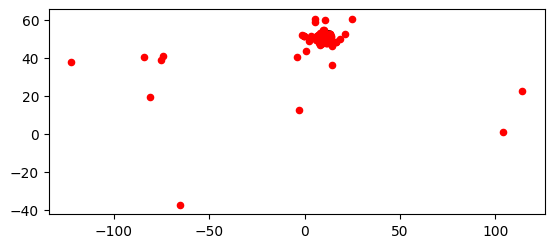

In [3]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Geocode function to get latitude and longitude
def geocode(city):
    try:
        # Geolocate the center of the city
        loc = geolocator.geocode(city)
        return loc.latitude, loc.longitude
    except:
        return None
    
#create df with number of angels per location
df_angels = df_angels.groupby(['location']).size().reset_index(name='counts')
print(df_angels)
#
# Apply the geocode function to each city in your DataFrame
df_angels['coords'] = df_angels['location'].apply(geocode)

# Drop rows with missing coordinates
df_angels = df_angels.dropna(subset=['coords'])

# Create a GeoDataFrame from your DataFrame
gdf = gpd.GeoDataFrame(df_angels, geometry=gpd.points_from_xy(df_angels['coords'].str[1], df_angels['coords'].str[0]))

# Read the Germany map
germany = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))['name'] == 'Germany']

# Plot the Germany map
ax = germany.plot(color='white', edgecolor='black')

# Plot the locations on the map
gdf.plot(ax=ax, color='red', markersize=20)

plt.show()

In [35]:
#import csv startupdetector and create df
df_startupdetector = pd.read_csv('dataframes/startupdetector.csv',sep=";")
print(df_startupdetector)

      startup_id                                       startup_name  \
0      startup_1                                 BCN Food Tech GmbH   
1      startup_2              clever unlock UG (haftungsbeschränkt)   
2      startup_3                                 Craft Clarity GmbH   
3      startup_4  APFL Advanced Pet Food Labs UG (haftungsbeschr...   
4      startup_5             AT - Alpi Tech UG (haftungsbeschränkt)   
...          ...                                                ...   
19699        NaN                                                NaN   
19700        NaN                                                NaN   
19701        NaN                                                NaN   
19702        NaN                                                NaN   
19703        NaN                                                NaN   

      date_incorporated register_identification_number  \
0            2021-12-31                     HRB 272187   
1            2021-12-31        

In [34]:
#import csv startups_rows and create df
df_startups_rows = pd.read_csv('dataframes/startups_rows.csv')
print(df_startups_rows)

       startup_id                     created_at  \
0            8039   2024-01-17 10:12:57.57515+00   
1            4581   2024-01-17 10:12:54.79246+00   
2              22  2024-01-17 10:12:50.707796+00   
3           13388  2024-01-17 10:13:02.185889+00   
4            6680  2024-01-17 10:12:55.987461+00   
...           ...                            ...   
10910       11943  2024-01-17 10:13:00.689369+00   
10911        6217  2024-01-17 10:12:55.987461+00   
10912        8913  2024-01-17 10:12:58.304802+00   
10913       13951  2024-01-17 10:21:45.090336+00   
10914        4551   2024-01-17 10:12:54.79246+00   

                        startup_name  \
0              Trading Robotics GmbH   
1                      Archigas GmbH   
2              Megavoid Studios GmbH   
3                      wisefood GmbH   
4                Cloud Creators GmbH   
...                              ...   
10910  Markonia Eyewear Germany GmbH   
10911                     Kineo GmbH   
10912          

In [36]:


#get subset of df_startupdetector where startup_name is not in df_startup_rows
df_startupdetector = df_startupdetector[~df_startupdetector['startup_name'].isin(df_startups_rows['startup_name'])]
#drop where startup_name is null
df_startupdetector = df_startupdetector.dropna(subset=['startup_name'])
print(df_startupdetector)


          startup_id                                       startup_name  \
1          startup_2              clever unlock UG (haftungsbeschränkt)   
3          startup_4  APFL Advanced Pet Food Labs UG (haftungsbeschr...   
4          startup_5             AT - Alpi Tech UG (haftungsbeschränkt)   
5          startup_6                 avirtually UG (haftungsbeschränkt)   
7          startup_8            Blockchain Labs UG (haftungsbeschränkt)   
...              ...                                                ...   
14071  startup_14072                  Pandanote UG (haftungsbeschränkt)   
14072  startup_14073                    PIXSAME UG (haftungsbeschränkt)   
14088  startup_14089                     Skagic UG (haftungsbeschränkt)   
14089  startup_14090         SkillCert Solution UG (haftungsbeschränkt)   
14102  startup_14103                      Inuco UG (haftungsbeschränkt)   

      date_incorporated register_identification_number  \
1            2021-12-31                  

In [39]:
#in df_startupdetector, add columns shareholder_json list_mds number_shareholders number_angels startup_purpose link_shareholder_file_2021 register_mapping  startup_industry_mapped azure_json error link_structured_content_file_current link_SI_file_current azure_json_2021 shareholder_json_2021
df_startupdetector['shareholder_json'] = None
df_startupdetector['list_mds'] = None
df_startupdetector['number_shareholders'] = None
df_startupdetector['number_angels'] = None
df_startupdetector['startup_purpose'] = None
df_startupdetector['link_shareholder_file_2021'] = None
df_startupdetector['register_mapping'] = None
df_startupdetector['startup_industry_mapped'] = None
df_startupdetector['azure_json'] = None
df_startupdetector['error'] = None
df_startupdetector['link_structured_content_file_current'] = None
df_startupdetector['link_SI_file_current'] = None
df_startupdetector['azure_json_2021'] = None
df_startupdetector['shareholder_json_2021'] = None

#rename column linkedin to startup_linkedin and rename column website to startup_website and column location to startup_location
df_startupdetector.rename(columns={'LinkedIn':'startup_linkedin'}, inplace=True)
df_startupdetector.rename(columns={'website':'startup_website'}, inplace=True)
df_startupdetector.rename(columns={'location':'startup_location'}, inplace=True)


print(df_startupdetector)


          startup_id                                       startup_name  \
1          startup_2              clever unlock UG (haftungsbeschränkt)   
3          startup_4  APFL Advanced Pet Food Labs UG (haftungsbeschr...   
4          startup_5             AT - Alpi Tech UG (haftungsbeschränkt)   
5          startup_6                 avirtually UG (haftungsbeschränkt)   
7          startup_8            Blockchain Labs UG (haftungsbeschränkt)   
...              ...                                                ...   
14071  startup_14072                  Pandanote UG (haftungsbeschränkt)   
14072  startup_14073                    PIXSAME UG (haftungsbeschränkt)   
14088  startup_14089                     Skagic UG (haftungsbeschränkt)   
14089  startup_14090         SkillCert Solution UG (haftungsbeschränkt)   
14102  startup_14103                      Inuco UG (haftungsbeschränkt)   

      date_incorporated register_identification_number  \
1            2021-12-31                  

In [44]:
#remove values in startup_id
df_startupdetector['startup_id'] = None
#add values in startup_id starting wioth 14116
for i in range(len(df_startupdetector)):
    df_startupdetector['startup_id'][i] = 14116+i
#drop index
df_startupdetector = df_startupdetector.reset_index(drop=True)
print(df_startupdetector)

#save df_startupdetector to csv
df_startupdetector.to_csv('dataframes/startupdetector_cleaned.csv',index=False,sep=";",encoding='utf-8')

     startup_id                                       startup_name  \
0         14116              clever unlock UG (haftungsbeschränkt)   
1         14117  APFL Advanced Pet Food Labs UG (haftungsbeschr...   
2         14118             AT - Alpi Tech UG (haftungsbeschränkt)   
3         14119                 avirtually UG (haftungsbeschränkt)   
4         14120            Blockchain Labs UG (haftungsbeschränkt)   
...         ...                                                ...   
3196      17312                  Pandanote UG (haftungsbeschränkt)   
3197      17313                    PIXSAME UG (haftungsbeschränkt)   
3198      17314                     Skagic UG (haftungsbeschränkt)   
3199      17315         SkillCert Solution UG (haftungsbeschränkt)   
3200      17316                      Inuco UG (haftungsbeschränkt)   

     date_incorporated register_identification_number  \
0           2021-12-31                      HRB 39734   
1           2021-12-30                   HRB 

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26837/854257909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_startupdetector['startup_id'][i] = 14116+i


In [15]:
# get the startupdetector column startup_name
startup_names = df_startupdetector['startup_name']
print(startup_names)
#get the startup_rows column startup_name
startup_names_DB = df_startups_rows['startup_name']



0                                       BCN Food Tech GmbH
1                    clever unlock UG (haftungsbeschränkt)
2                                       Craft Clarity GmbH
3        APFL Advanced Pet Food Labs UG (haftungsbeschr...
4                   AT - Alpi Tech UG (haftungsbeschränkt)
                               ...                        
19699                                                  NaN
19700                                                  NaN
19701                                                  NaN
19702                                                  NaN
19703                                                  NaN
Name: startup_name, Length: 19704, dtype: object


In [16]:
#get all startup_name from startupdetector that are not in startup_rows
startup_names_not_in_DB = startup_names[~startup_names.isin(startup_names_DB)]


In [19]:
startup_names_not_in_DB.dropna(inplace=True)
startup_names_not_in_DB

1                    clever unlock UG (haftungsbeschränkt)
3        APFL Advanced Pet Food Labs UG (haftungsbeschr...
4                   AT - Alpi Tech UG (haftungsbeschränkt)
5                       avirtually UG (haftungsbeschränkt)
7                  Blockchain Labs UG (haftungsbeschränkt)
                               ...                        
14071                    Pandanote UG (haftungsbeschränkt)
14072                      PIXSAME UG (haftungsbeschränkt)
14088                       Skagic UG (haftungsbeschränkt)
14089           SkillCert Solution UG (haftungsbeschränkt)
14102                        Inuco UG (haftungsbeschränkt)
Name: startup_name, Length: 3201, dtype: object

In [21]:
#add startup_names_not_in_DB to startup_rows as entries to column startup_name
for i in startup_names_not_in_DB:
    df_startups_rows = df_startups_rows.append({'startup_name': i}, ignore_index=True)
print(df_startups_rows)


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26837/3441752972.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_startups_rows = df_startups_rows.append({'startup_name': i}, ignore_index=True)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26837/3441752972.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_startups_rows = df_startups_rows.append({'startup_name': i}, ignore_index=True)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26837/3441752972.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_startups_rows = df_startups_rows.append({'startup_name': i}, ignore_index=True)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26837/3441752972.py:3: FutureWarning: The

KeyboardInterrupt: 